In [1]:
#!pip install pydicom Pillow

In [2]:
## https://physionet.org/content/vindr-spinexr/1.0.0/
# VinDr-SpineXR: A large annotated medical image dataset for spinal lesions detection and classification from radiographs
## Solo se usaran aproximadamente 400 imagenes aproximadamente.

In [3]:
import pydicom
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns

input_folder = './train_images/'
output_folder = './pngc7/'
os.makedirs(output_folder, exist_ok=True)

In [4]:


# def convert_dicom_to_png(dicom_file, output_file):
#     # Leer el archivo DICOM
#     ds = pydicom.dcmread(dicom_file)
    
#     # Obtener el array de píxeles
#     pixel_array = ds.pixel_array
    
#     # Normalizar los valores de los píxeles
#     image = (np.maximum(pixel_array, 0) / pixel_array.max()) * 255.0
#     image = np.uint8(image)
    
#     # Convertir a una imagen PIL
#     img = Image.fromarray(image)
    
#     # Guardar como PNG
#     img.save(output_file)

# for filename in os.listdir(input_folder):
#     if filename.endswith('.dicom'):
#         dicom_file = os.path.join(input_folder, filename)
#         output_file = os.path.join(output_folder, os.path.splitext(filename)[0] + '.png')
#         convert_dicom_to_png(dicom_file, output_file)
#         print(f'Converted {dicom_file} to {output_file}')

In [5]:
import pandas as pd

# Leer el archivo CSV
nombre_archivo = './'
df = pd.read_csv("train.csv")

# Mostrar las primeras filas del DataFrame para verificar que se ha leído correctamente
print(df.head())

                           study_id                         series_id  \
0  88ec4a2f0842407e5489b53728a1709b  c0b663cf5497398f49dd717b46debf06   
1  88ec4a2f0842407e5489b53728a1709b  c0b663cf5497398f49dd717b46debf06   
2  88ec4a2f0842407e5489b53728a1709b  c0b663cf5497398f49dd717b46debf06   
3  88ec4a2f0842407e5489b53728a1709b  c0b663cf5497398f49dd717b46debf06   
4  88ec4a2f0842407e5489b53728a1709b  c0b663cf5497398f49dd717b46debf06   

                           image_id rad_id  lesion_type        xmin  \
0  1f1c5c098c35b79052596aae08ac727f   rad1  Osteophytes  712.636842   
1  1f1c5c098c35b79052596aae08ac727f   rad1  Osteophytes  789.949123   
2  1f1c5c098c35b79052596aae08ac727f   rad1  Osteophytes  692.468421   
3  1f1c5c098c35b79052596aae08ac727f   rad1  Osteophytes  820.201754   
4  1f1c5c098c35b79052596aae08ac727f   rad1  Osteophytes  739.528070   

          ymin        xmax         ymax  
0   961.361404  786.587719  1011.782456  
1  1452.126316  880.707018  1505.908772  
2   655.

In [6]:
df

,study_id,series_id,image_id,rad_id,lesion_type,xmin,ymin,xmax,ymax
0,88ec4a2f0842407e5489b53728a1709b,c0b663cf5497398f49dd717b46debf06,1f1c5c098c35b79052596aae08ac727f,rad1,Osteophytes,712.636842,961.361404,786.587719,1011.782456
1,88ec4a2f0842407e5489b53728a1709b,c0b663cf5497398f49dd717b46debf06,1f1c5c098c35b79052596aae08ac727f,rad1,Osteophytes,789.949123,1452.126316,880.707018,1505.908772
2,88ec4a2f0842407e5489b53728a1709b,c0b663cf5497398f49dd717b46debf06,1f1c5c098c35b79052596aae08ac727f,rad1,Osteophytes,692.468421,655.473684,746.250877,709.256140
3,88ec4a2f0842407e5489b53728a1709b,c0b663cf5497398f49dd717b46debf06,1f1c5c098c35b79052596aae08ac727f,rad1,Osteophytes,820.201754,1603.389474,910.959649,1670.617544
4,88ec4a2f0842407e5489b53728a1709b,c0b663cf5497398f49dd717b46debf06,1f1c5c098c35b79052596aae08ac727f,rad1,Osteophytes,739.528070,1203.382456,820.201754,1240.357895
...,...,...,...,...,...,...,...,...,...
19545,15354677a17156fbb5a617d694f2d25d,1ace0c1895cd8314a54de49ce33777fe,ac8e211d4421d61cbdbcb09cdf56689b,rad3,Osteophytes,787.542725,952.548110,868.524176,1027.394602
19546,15354677a17156fbb5a617d694f2d25d,1ace0c1895cd8314a54de49ce33777fe,ac8e211d4421d61cbdbcb09cdf56689b,rad3,Osteophytes,771.591833,864.204709,826.806459,930.462259
19547,d7f725fa068661e40db47afaf6811935,ab1126ea55e8423c17b39f1505930c8a,944a3478b664b658389013f512212562,rad1,No finding,NaN,NaN,NaN,NaN
19548,d7f725fa068661e40db47afaf6811935,4044143ef993d5738d742cb93a418c2c,e3b297bc7d0281331a674d107fb5d0eb,rad1,Osteophytes,1058.837967,1094.127085,1180.648928,1186.162033


In [7]:
nombre_columna = df.columns[2]
carpeta_imagenes = './pngc7/'

# Función para verificar si el archivo existe
def archivo_existe(nombre_archivo):
    return os.path.isfile(os.path.join(carpeta_imagenes, f'{nombre_archivo}.png'))

# Filtrar el DataFrame para eliminar las filas donde el archivo no existe
df1 = df[df[nombre_columna].apply(archivo_existe)]

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(df1.head())


                             study_id                         series_id  \
56   2680f4a84310da452712d13ce28e3059  04e58462ac94ac5bd60748fb7ca9ce9b   
66   960cde1efd3ca3d201744c0a05cfac90  8973d780c10ca5628aec0e034175c892   
115  1e550a32c6d8e5adb53b01d32fcc29f8  196f2e176774802b7cc6d8f124fb8a4a   
116  1e550a32c6d8e5adb53b01d32fcc29f8  8e487446178e4d267b5a722c57a90cef   
126  2ca52327cfb12c6d3b4a45f0f4ea627c  859f3eb6edff9deac45d2e63ce1ede91   

                             image_id rad_id lesion_type  xmin  ymin  xmax  \
56   044791c201e6080236f2410499440fff   rad1  No finding   NaN   NaN   NaN   
66   0b6fe9c0171493972eab0a828c8d1309   rad1  No finding   NaN   NaN   NaN   
115  00881470cf7bb6696dc0c460d8397e12   rad1  No finding   NaN   NaN   NaN   
116  02764b71703aaa4556d3be2296245a31   rad1  No finding   NaN   NaN   NaN   
126  0c4d1a8264e706fa2871a14dc74b14f5   rad1  No finding   NaN   NaN   NaN   

     ymax  
56    NaN  
66    NaN  
115   NaN  
116   NaN  
126   NaN  


In [8]:
df1 = df1.drop_duplicates(subset=df.columns[2])
print(df1.head())


                             study_id                         series_id  \
56   2680f4a84310da452712d13ce28e3059  04e58462ac94ac5bd60748fb7ca9ce9b   
66   960cde1efd3ca3d201744c0a05cfac90  8973d780c10ca5628aec0e034175c892   
115  1e550a32c6d8e5adb53b01d32fcc29f8  196f2e176774802b7cc6d8f124fb8a4a   
116  1e550a32c6d8e5adb53b01d32fcc29f8  8e487446178e4d267b5a722c57a90cef   
126  2ca52327cfb12c6d3b4a45f0f4ea627c  859f3eb6edff9deac45d2e63ce1ede91   

                             image_id rad_id lesion_type  xmin  ymin  xmax  \
56   044791c201e6080236f2410499440fff   rad1  No finding   NaN   NaN   NaN   
66   0b6fe9c0171493972eab0a828c8d1309   rad1  No finding   NaN   NaN   NaN   
115  00881470cf7bb6696dc0c460d8397e12   rad1  No finding   NaN   NaN   NaN   
116  02764b71703aaa4556d3be2296245a31   rad1  No finding   NaN   NaN   NaN   
126  0c4d1a8264e706fa2871a14dc74b14f5   rad1  No finding   NaN   NaN   NaN   

     ymax  
56    NaN  
66    NaN  
115   NaN  
116   NaN  
126   NaN  


In [9]:
df1

,study_id,series_id,image_id,rad_id,lesion_type,xmin,ymin,xmax,ymax
56,2680f4a84310da452712d13ce28e3059,04e58462ac94ac5bd60748fb7ca9ce9b,044791c201e6080236f2410499440fff,rad1,No finding,NaN,NaN,NaN,NaN
66,960cde1efd3ca3d201744c0a05cfac90,8973d780c10ca5628aec0e034175c892,0b6fe9c0171493972eab0a828c8d1309,rad1,No finding,NaN,NaN,NaN,NaN
115,1e550a32c6d8e5adb53b01d32fcc29f8,196f2e176774802b7cc6d8f124fb8a4a,00881470cf7bb6696dc0c460d8397e12,rad1,No finding,NaN,NaN,NaN,NaN
116,1e550a32c6d8e5adb53b01d32fcc29f8,8e487446178e4d267b5a722c57a90cef,02764b71703aaa4556d3be2296245a31,rad1,No finding,NaN,NaN,NaN,NaN
126,2ca52327cfb12c6d3b4a45f0f4ea627c,859f3eb6edff9deac45d2e63ce1ede91,0c4d1a8264e706fa2871a14dc74b14f5,rad1,No finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19346,6444c9193c9c4d2bcf6e459d7c882381,ac1d85a7609155ee455c7772e4bd3b53,08b452d45f4af101ca386bc131bd2d2e,rad2,Osteophytes,788.860976,1446.400000,859.266904,1548.052392
19352,c9d63b7a4952e9b16732e814ab903612,1f9f3628148a0d36e77a77777a55e997,0033ba0f26912e9590562c482bc1cd46,rad2,Foraminal stenosis,1263.316595,1103.106322,1334.825383,1235.908358
19393,86930368cbb7a797ddfbac40d0db2df7,ecde327681a54d4eacb3b221115a0698,0c02b769f8b7187fb79505c6b14eae51,rad2,Osteophytes,1143.034030,1659.597862,1222.886546,1788.301328
19428,ae04a1174647f1066f74cb1129a87af9,c3e46353d057ef6aa22ab469c6bd73cf,0aadbcba8ccf353b220610abe72a73a4,rad2,Osteophytes,2271.672358,2050.282927,2340.589431,2107.713821


Descripción estadística de la columna 7:
count            467
unique             8
top       No finding
freq             257
Name: lesion_type, dtype: object


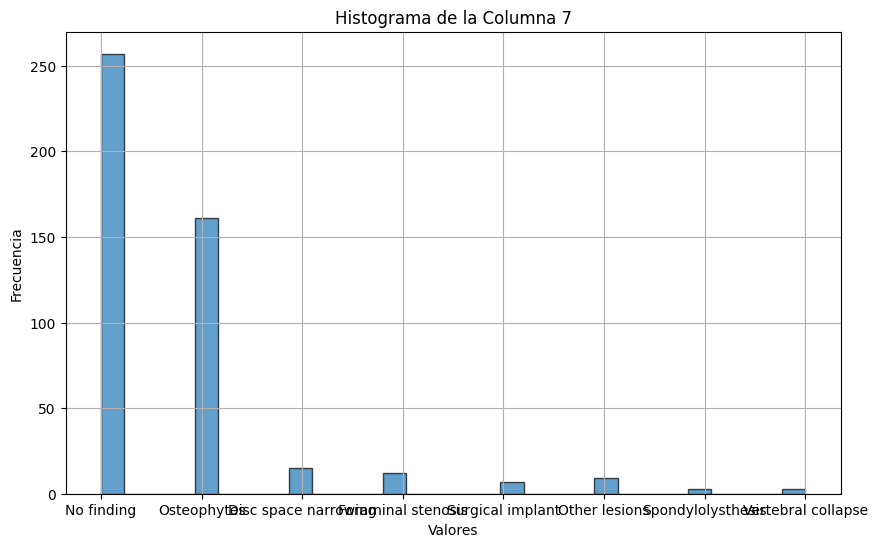

In [10]:
columna_7 = df1.iloc[:, 4]

# Análisis estadístico básico
descripcion = columna_7.describe()
print("Descripción estadística de la columna 7:")
print(descripcion)

# Generar histogramas usando matplotlib
plt.figure(figsize=(10, 6))
plt.hist(columna_7, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de la Columna 7')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [11]:
columna_4 = df.iloc[:, 4]
columna_4.unique()

array(['Osteophytes', 'No finding', 'Other lesions', 'Spondylolysthesis',
       'Disc space narrowing', 'Vertebral collapse', 'Foraminal stenosis',
       'Surgical implant'], dtype=object)

In [12]:
#Eliminamos clases con pocos datos

df2 = df1[~df1[df1.columns[4]].isin(['Spondylolysthesis','Disc space narrowing','Vertebral collapse','Foraminal stenosis','Surgical implant','Other lesions'])]
df2

,study_id,series_id,image_id,rad_id,lesion_type,xmin,ymin,xmax,ymax
56,2680f4a84310da452712d13ce28e3059,04e58462ac94ac5bd60748fb7ca9ce9b,044791c201e6080236f2410499440fff,rad1,No finding,NaN,NaN,NaN,NaN
66,960cde1efd3ca3d201744c0a05cfac90,8973d780c10ca5628aec0e034175c892,0b6fe9c0171493972eab0a828c8d1309,rad1,No finding,NaN,NaN,NaN,NaN
115,1e550a32c6d8e5adb53b01d32fcc29f8,196f2e176774802b7cc6d8f124fb8a4a,00881470cf7bb6696dc0c460d8397e12,rad1,No finding,NaN,NaN,NaN,NaN
116,1e550a32c6d8e5adb53b01d32fcc29f8,8e487446178e4d267b5a722c57a90cef,02764b71703aaa4556d3be2296245a31,rad1,No finding,NaN,NaN,NaN,NaN
126,2ca52327cfb12c6d3b4a45f0f4ea627c,859f3eb6edff9deac45d2e63ce1ede91,0c4d1a8264e706fa2871a14dc74b14f5,rad1,No finding,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19235,d8724617003d2275e68e97a36f1e27e7,0272a916e94aa458d1355560959cd119,0c498485ee805d19fa4c8236b015c267,rad3,Osteophytes,851.865921,1163.585871,917.688388,1234.471605
19346,6444c9193c9c4d2bcf6e459d7c882381,ac1d85a7609155ee455c7772e4bd3b53,08b452d45f4af101ca386bc131bd2d2e,rad2,Osteophytes,788.860976,1446.400000,859.266904,1548.052392
19393,86930368cbb7a797ddfbac40d0db2df7,ecde327681a54d4eacb3b221115a0698,0c02b769f8b7187fb79505c6b14eae51,rad2,Osteophytes,1143.034030,1659.597862,1222.886546,1788.301328
19428,ae04a1174647f1066f74cb1129a87af9,c3e46353d057ef6aa22ab469c6bd73cf,0aadbcba8ccf353b220610abe72a73a4,rad2,Osteophytes,2271.672358,2050.282927,2340.589431,2107.713821


Descripción estadística de la columna 7:
count            418
unique             2
top       No finding
freq             257
Name: lesion_type, dtype: object


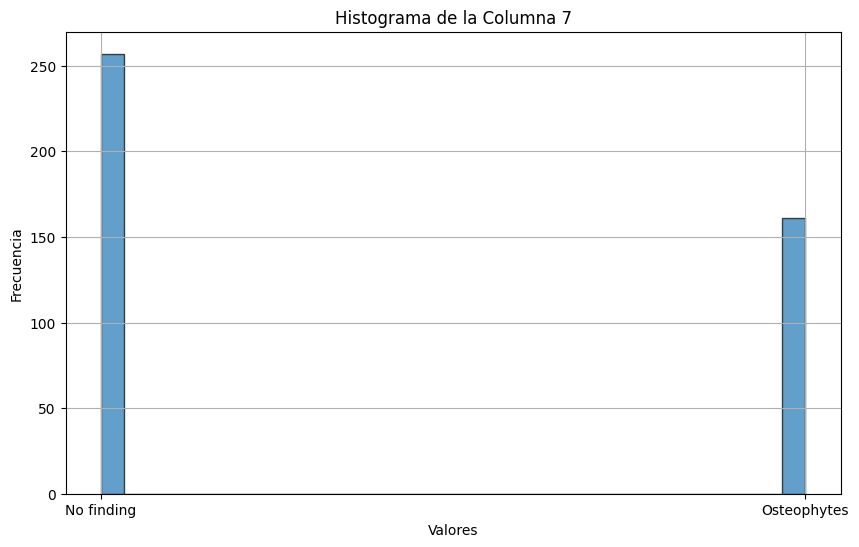

In [13]:
columna_7 = df2.iloc[:, 4]

# Análisis estadístico básico
descripcion = columna_7.describe()
print("Descripción estadística de la columna 7:")
print(descripcion)

# Generar histogramas usando matplotlib
plt.figure(figsize=(10, 6))
plt.hist(columna_7, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de la Columna 7')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [15]:
#sample_image_name

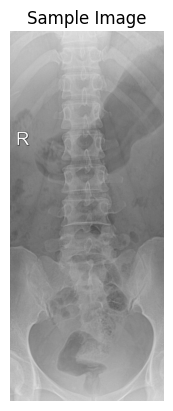

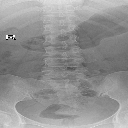

In [16]:

image_folder = './pngc7/'
sample_image_name = df2.iloc[0, 2] +'.png'
sample_image_path = os.path.join(image_folder, sample_image_name)

# Cargar la imagen
img = load_img(sample_image_path, color_mode='grayscale')
img_array = img_to_array(img)

# Mostrar la imagen
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title('Sample Image')
plt.axis('off')
plt.show()
image_size = (128, 128)
img = load_img('./pngc7/'+sample_image_name, target_size=image_size, color_mode='grayscale')
img

In [17]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:

#img2 = load_img('./pngc7/00881470cf7bb6696dc0c460d8397e12.png', target_size=image_size, color_mode='grayscale')


In [19]:
image_folder = 'pngc7'
df2 = df2[df2['image_id'] != '00881470cf7bb6696dc0c460d8397e12']

images = []
labels = []

for index, row in df2.iterrows():
    image_name = row.iloc[2] + '.png' 
    image_path = os.path.join(image_folder, image_name)
    try:
        img = load_img(image_path, target_size=image_size, color_mode='grayscale')
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(row.iloc[4])  
    except (FileNotFoundError, OSError) as e:
        print(f"Error loading image {image_name}: {e}")
import cv2
import numpy as np

def increase_contrast(image):
    """
    Aumenta el contraste de una imagen en escala de grises usando CLAHE.
    
    Parameters:
        image (numpy array): La imagen original en escala de grises.
    
    Returns:
        numpy array: La imagen con el contraste aumentado.
    """
    # Convertir la imagen a formato uint8 si no lo está
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    
    # Verificar si la imagen es un array numpy válido
    if not isinstance(image, np.ndarray):
        raise ValueError("La imagen no es un array numpy válido.")
    
    # Verificar si la imagen es en escala de grises
    if len(image.shape) != 2:
        raise ValueError("La imagen debe ser en escala de grises.")
    
    # Aplicar CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Aplicar el aumento de contraste a las imágenes de entrenamiento y validación
images = [np.expand_dims(increase_contrast(np.squeeze(i)), axis=-1) for i in images]

images = np.array(images, dtype='float32') / 255.0  
labels = np.array(labels)

In [20]:
labels[0]

'No finding'

In [21]:
print(len(images))
print(len(labels))

417
417


In [22]:
import random
# Obtén un nuevo orden aleatorio de los índices
random_order = np.random.permutation(len(images))

# Aplica el nuevo orden a ambos arrays
images2 = images[random_order]
labels2 = labels[random_order]

In [23]:
#images2


In [24]:
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas de texto a números enteros
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels2)

# Aplicar to_categorical a las etiquetas codificadas
labels_categorical = to_categorical(labels_encoded)

# Verificar las etiquetas convertidas
#print(labels_categorical)
x_train, x_val, y_train, y_val = train_test_split(images2, labels_categorical, test_size=0.2, random_state=60)

In [25]:
labels_categorical.shape

(417, 2)

## Arquitectura  CNN


In [26]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dropout(0.6),
#     Dense(2, activation='softmax')
# ])

# #model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Habilitar la precisión mixta
# policy = tf.keras.mixed_precision.Policy('mixed_float16')
# tf.keras.mixed_precision.set_global_policy(policy)

def unet(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder (Downsampling path)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D((2, 2))(drop4)

    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder (Upsampling path)
    up6 = Conv2D(128, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(drop5))
    merge6 = Concatenate()([drop4, up6])
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2D(64, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(conv6))
    merge7 = Concatenate()([conv3, up7])
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2D(32, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(conv7))
    merge8 = Concatenate()([conv2, up8])
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2D(16, (2, 2), activation='relu', padding='same')(UpSampling2D((2, 2))(conv8))
    merge9 = Concatenate()([conv1, up9])
    conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Flatten and add fully connected layer for classification
    flat = Flatten()(conv9)
    dense1 = Dense(64, activation='relu')(flat)
    drop1 = Dropout(0.5)(dense1)
    outputs = Dense(2, activation='softmax')(drop1)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Definir las dimensiones de entrada de las imágenes y el número de clases
input_shape = (128, 128,1)
num_classes = 2  # Para clasificación binaria

# Crear el modelo U-Net
model = unet(input_shape)

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Aplicar data augmentation
datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Definir el tamaño del lote y el número de épocas
batch_size = 2  # Reducir el tamaño del lote
epochs = 50

# Entrenar el modelo
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

Epoch 1/50
166/166 [==============================] - 16s 57ms/step - loss: 8.0692 - accuracy: 0.5468 - val_loss: 13.1675 - val_accuracy: 0.5833
Epoch 2/50
166/166 [==============================] - 6s 37ms/step - loss: 0.8774 - accuracy: 0.6284 - val_loss: 8.7666 - val_accuracy: 0.4405
Epoch 3/50
166/166 [==============================] - 6s 36ms/step - loss: 0.7586 - accuracy: 0.6224 - val_loss: 0.9268 - val_accuracy: 0.5952
Epoch 4/50
166/166 [==============================] - 6s 38ms/step - loss: 0.6812 - accuracy: 0.6344 - val_loss: 0.9580 - val_accuracy: 0.5952
Epoch 5/50
166/166 [==============================] - 6s 37ms/step - loss: 0.7491 - accuracy: 0.6163 - val_loss: 0.8858 - val_accuracy: 0.5833
Epoch 6/50
166/166 [==============================] - 6s 39ms/step - loss: 0.6870 - accuracy: 0.6224 - val_loss: 1.4409 - val_accuracy: 0.5595
Epoch 7/50
166/166 [==============================] - 6s 36ms/step - loss: 0.6725 - accuracy: 0.6224 - val_loss: 0.7805 - val_accuracy: 0.55

In [27]:
# #Aplicamos data augmentation para mejorar la predicción
# datagen = ImageDataGenerator(
#     #rotation_range=20,
#     #width_shift_range=0.2,
#     #height_shift_range=0.2,
#     #shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
# )

# batch_size = 8
# epochs = 50

# history = model.fit(
#     datagen.flow(x_train, y_train, batch_size=batch_size),
#     steps_per_epoch=len(x_train) // batch_size,
#     epochs=epochs,
#     validation_data=(x_val, y_val)
# )



In [28]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

3/3 [==============================] - 0s 35ms/step - loss: 0.6807 - accuracy: 0.5952
Validation Loss: 0.6806650757789612
Validation Accuracy: 0.5952380895614624


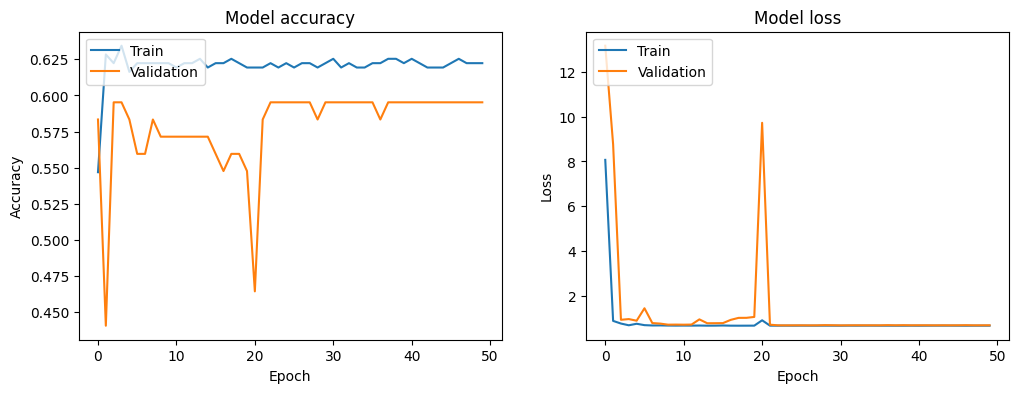

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [30]:
import gc
gc.collect()

8574

In [31]:
import numpy as np

def normalize_image(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

from scipy.ndimage import gaussian_filter, median_filter

def apply_filter(image, filter_type='gaussian', sigma=1):
    if filter_type == 'gaussian':
        return gaussian_filter(image, sigma=sigma)
    elif filter_type == 'median':
        return median_filter(image, size=3)

import tensorflow as tf

def preprocess_image(image):
    image = normalize_image(image)
    image = apply_filter(image, filter_type='gaussian', sigma=1)
    return image
x_train = np.array([preprocess_image(img) for img in x_train])
x_val = np.array([preprocess_image(img) for img in x_val])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def simplified_unet(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Encoder (Downsampling path)
    conv1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    drop3 = tf.keras.layers.Dropout(0.5)(conv3)

    # Decoder (Upsampling path)
    up4 = tf.keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(drop3))
    merge4 = tf.keras.layers.Concatenate()([conv2, up4])
    conv4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(merge4)

    up5 = tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(conv4))
    merge5 = tf.keras.layers.Concatenate()([conv1, up5])
    conv5 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(merge5)

    # Flatten and add fully connected layer for classification
    flat = tf.keras.layers.Flatten()(conv5)
    dense1 = tf.keras.layers.Dense(32, activation='relu')(flat)
    drop1 = tf.keras.layers.Dropout(0.5)(dense1)
    outputs = tf.keras.layers.Dense(2, activation='softmax')(drop1)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (128, 128, 1)
num_classes = 2

model = simplified_unet(input_shape)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 4
epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

Epoch 1/50
83/83 [==============================] - 4s 28ms/step - loss: 0.8562 - accuracy: 0.6201 - val_loss: 0.6889 - val_accuracy: 0.5833
Epoch 2/50
83/83 [==============================] - 2s 22ms/step - loss: 0.6854 - accuracy: 0.6201 - val_loss: 0.6848 - val_accuracy: 0.5833
Epoch 3/50
83/83 [==============================] - 2s 22ms/step - loss: 0.6831 - accuracy: 0.6261 - val_loss: 0.6824 - val_accuracy: 0.5833
Epoch 4/50
83/83 [==============================] - 2s 22ms/step - loss: 0.6726 - accuracy: 0.6261 - val_loss: 0.6818 - val_accuracy: 0.5833
Epoch 5/50
83/83 [==============================] - 2s 22ms/step - loss: 0.6773 - accuracy: 0.6231 - val_loss: 0.6808 - val_accuracy: 0.5833
Epoch 6/50
83/83 [==============================] - 2s 29ms/step - loss: 0.6688 - accuracy: 0.6201 - val_loss: 0.6784 - val_accuracy: 0.5833
Epoch 7/50
83/83 [==============================] - 2s 24ms/step - loss: 0.6729 - accuracy: 0.6231 - val_loss: 0.6816 - val_accuracy: 0.5833
Epoch 8/50
83

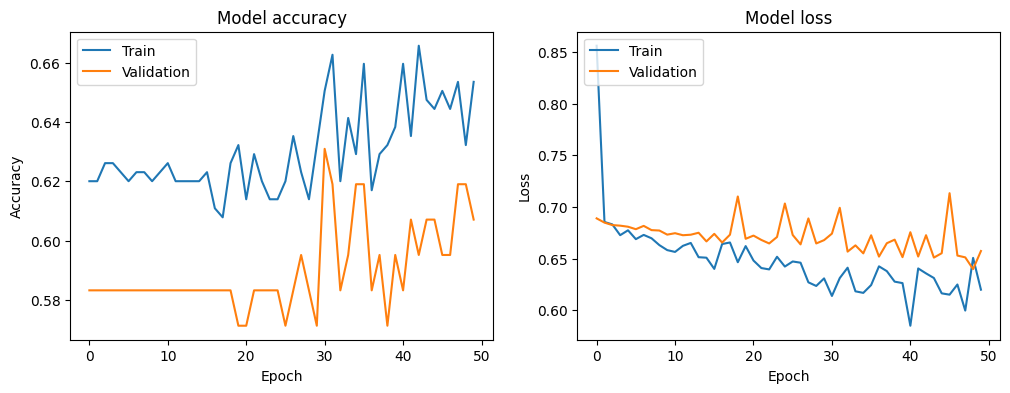

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [40]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

#model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
#Aplicamos data augmentation para mejorar la predicción
datagen = ImageDataGenerator(
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

batch_size = 8
epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

Epoch 1/50
41/41 [==============================] - 2s 30ms/step - loss: 0.6843 - accuracy: 0.6000 - val_loss: 0.6823 - val_accuracy: 0.5833
Epoch 2/50
41/41 [==============================] - 1s 18ms/step - loss: 0.6769 - accuracy: 0.6215 - val_loss: 0.6814 - val_accuracy: 0.5833
Epoch 3/50
41/41 [==============================] - 1s 18ms/step - loss: 0.6708 - accuracy: 0.6277 - val_loss: 0.6861 - val_accuracy: 0.5833
Epoch 4/50
41/41 [==============================] - 1s 18ms/step - loss: 0.6625 - accuracy: 0.6308 - val_loss: 0.6702 - val_accuracy: 0.5833
Epoch 5/50
41/41 [==============================] - 1s 18ms/step - loss: 0.6648 - accuracy: 0.6185 - val_loss: 0.6652 - val_accuracy: 0.5833
Epoch 6/50
41/41 [==============================] - 1s 21ms/step - loss: 0.6692 - accuracy: 0.6185 - val_loss: 0.6689 - val_accuracy: 0.5833
Epoch 7/50
41/41 [==============================] - 1s 17ms/step - loss: 0.6406 - accuracy: 0.6215 - val_loss: 0.6699 - val_accuracy: 0.5833
Epoch 8/50
41

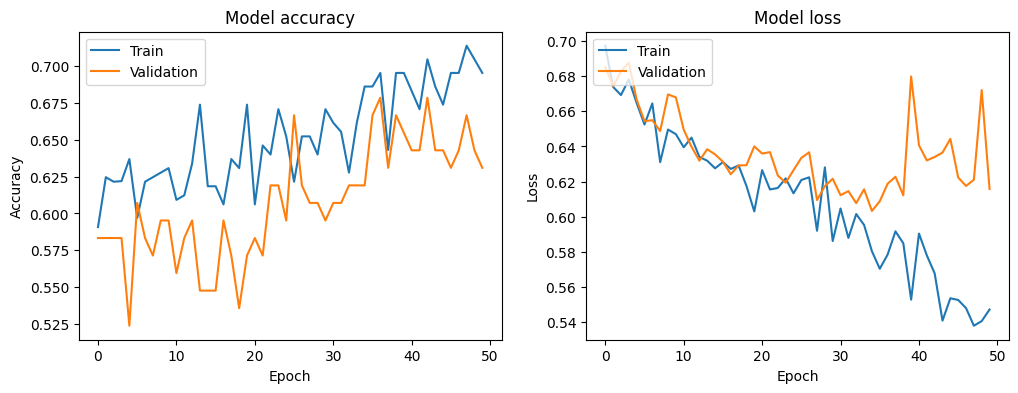

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [35]:
import cv2
import numpy as np

def increase_contrast(image):
    """
    Aumenta el contraste de una imagen en escala de grises usando CLAHE.
    
    Parameters:
        image (numpy array): La imagen original en escala de grises.
    
    Returns:
        numpy array: La imagen con el contraste aumentado.
    """
    # Convertir la imagen a formato uint8 si no lo está
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    
    # Verificar si la imagen es un array numpy válido
    if not isinstance(image, np.ndarray):
        raise ValueError("La imagen no es un array numpy válido.")
    
    # Verificar si la imagen es en escala de grises
    if len(image.shape) != 2:
        raise ValueError("La imagen debe ser en escala de grises.")
    
    # Aplicar CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Aplicar el aumento de contraste a las imágenes de entrenamiento y validación
img45=increase_contrast(np.squeeze(images[1]*255, axis=-1))

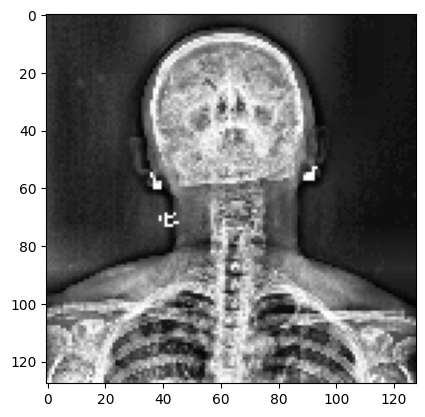

In [36]:
plt.imshow(img45, cmap='gray')  # Usa cmap='gray' si tu imagen es en escala de grises

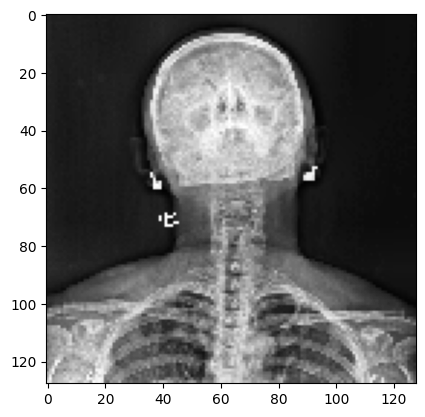

In [37]:
plt.imshow(images[1], cmap='gray')  # Usa cmap='gray' si tu imagen es en escala de grises


In [73]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    shortcut = x
    
    # First convolutional layer
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    # Second convolutional layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Add shortcut to main path
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    
    return x

def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Initial convolutional layer
    x = Conv2D(64, (4, 4), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (128, 128, 1)  
num_classes = 2 
model = ResNet(input_shape, num_classes)
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  
              metrics=['accuracy'])

model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_92 (Conv2D)             (None, 64, 64, 64)   1088        ['input_13[0][0]']               
                                                                                                  
 batch_normalization_74 (BatchN  (None, 64, 64, 64)  256         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [74]:

batch_size = 16
epochs = 35

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

Epoch 1/35
20/20 [==============================] - 3s 67ms/step - loss: 0.6850 - accuracy: 0.5962 - val_loss: 0.7605 - val_accuracy: 0.4167
Epoch 2/35
20/20 [==============================] - 1s 38ms/step - loss: 0.6566 - accuracy: 0.6309 - val_loss: 0.6709 - val_accuracy: 0.5714
Epoch 3/35
20/20 [==============================] - 1s 38ms/step - loss: 0.6458 - accuracy: 0.6435 - val_loss: 0.7221 - val_accuracy: 0.4881
Epoch 4/35
20/20 [==============================] - 1s 37ms/step - loss: 0.6532 - accuracy: 0.6125 - val_loss: 0.6859 - val_accuracy: 0.5833
Epoch 5/35
20/20 [==============================] - 1s 40ms/step - loss: 0.6337 - accuracy: 0.6498 - val_loss: 0.6963 - val_accuracy: 0.5833
Epoch 6/35
20/20 [==============================] - 1s 38ms/step - loss: 0.6432 - accuracy: 0.6404 - val_loss: 0.7233 - val_accuracy: 0.5833
Epoch 7/35
20/20 [==============================] - 1s 37ms/step - loss: 0.6481 - accuracy: 0.6246 - val_loss: 0.7026 - val_accuracy: 0.5833
Epoch 8/35
20

In [75]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

3/3 [==============================] - 0s 11ms/step - loss: 0.6994 - accuracy: 0.5952
Validation Loss: 0.6994284987449646
Validation Accuracy: 0.5952380895614624


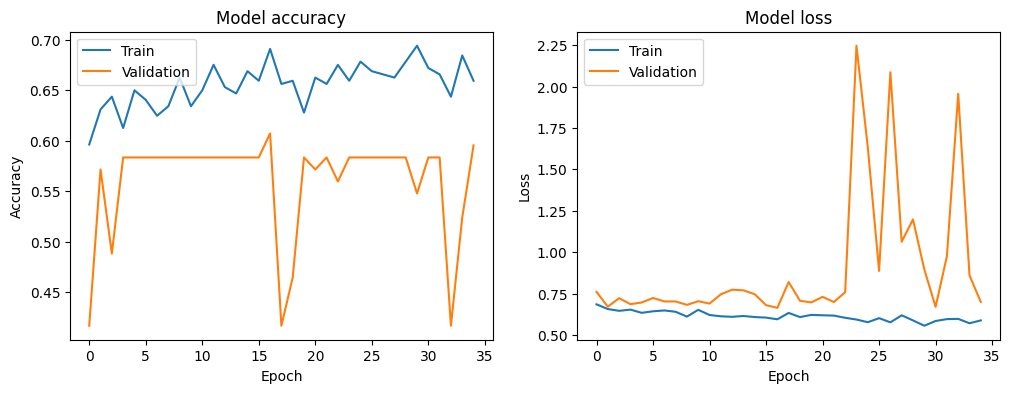

In [76]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [65]:
datagen = ImageDataGenerator(
    rotation_range=20,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,          
    horizontal_flip=True,   
    vertical_flip=True,      
    fill_mode='nearest'    
)

# Se intentó probar distintas arquitecturas de CNN para la clasificación de imagenes de CT con osteofitos y sin lesiones aparentes, se probo desde CNN simples hasta densenet, u-net, resnet, y otras, se usaron estas ya que la deteccion de osteofitos se puede asemejar a una segmentación de imagen, solo se cambio el output para una clasificación, los resultados fueron malos en todos los casos, el overfitting no se pudo rebajar ni con data augmentation ni con capas para estos.
# Se propone que un mejor dataset con cantidades más grandes de imagenes y un preprocesamiento aún más invasivo podría funcionar en la clasificación de osteofitos, como una segmentación del contorno para hallar puntas en los huesos que indica osteofitos.
